<a href="https://colab.research.google.com/github/UpalRoy-Decisionscientist/cnn-practice/blob/master/Pet_Classification_Model_Using_CNN_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT: Pet Classification Model Using CNN**

# **Project Objective**
To build a CNN model that classifies the given pet images correctly into dog and cat
images.

The project scope document specifies the requirements for the project “Pet
Classification Model Using CNN.” Apart from specifying the functional and nonfunctional
requirements for the project, it also serves as an input for project scoping.

# Project Description and Scope
We are provided with the following resources that can be used as inputs for your
model:
1. A collection of images of pets, that is​, ​cats and dogs. These images are of
different sizes with varied lighting conditions.
2. Code template containing the following code blocks:
a. Import modules (part 1)
b. Set hyper parameters (part 2)
c. Read image data set (part 3)
d. Run TensorFlow model (part 4)
You are expected to write the code for CNN image classification model (between Parts 3
and 4) using TensorFlow that trains on the data and calculates the accuracy score on the
test data.

# Project Guidelines
Begin by extracting ipynb file and the data in the same folder.
The CNN model (cnn_model_fn) should have the following layers:
● Input layer
● Convolutional layer 1 with 32 filters of kernel size[**5,5]**
● Pooling layer 1 with pool size**[2,2] **and stride 2
● Convolutional layer 2 with 64 filters of kernel size[5,5]
● Pooling layer 2 with pool size[2,2] and stride 2
● Dense layer whose output size is fixed in the hyper parameter: fc_size=32
● Dropout layer with dropout probability 0.4
Predict the class by doing a softmax on the output of the dropout lay bold text

**This should be followed by training and evaluation:**
For the training step, define the loss function and minimize it
● For the evaluation step, calculate the accuracy
Run the program for 100, 200, and 300 iterations, respectively. Follow this by a report
on the final accuracy and loss on the evaluation data.
Prerequisites
To execute this project, refer to the installation guide in the downloads section of LMS.

# Deep Learning Project: Pet Classifier using CNN
Prepration

Extract the ipynb file and the data in the same folder Data Set

A production grade program as 10,000 training images This is a small program with 20 images of cats and 20 images of dogs. The evaluation set has 10 images of cats and 10 images of dogs Runs

The student is expected to run the 100-300 training step A production grade code would have about 20k-50k training steps

# Data Loading and Exploratory Data Analysis (EDA)

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import cv2
import PIL
from cv2 import imshow
import numpy as np

In [0]:
from warnings import filterwarnings
filterwarnings('ignore')

In [0]:
# Run this cell to mount My Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir("drive")

FileNotFoundError: ignored

# Loding Data in My Google Colab

content/drive/My Drive/Deep_Learning_course_Capstone_Project

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import os
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
import sys
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import layers

print(tf.VERSION)
print(tf.keras.__version__)

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

1.14.0-rc1
2.2.4-tf


In [0]:
base_dir = '/content/drive/My Drive/Deep_Learning_course_Capstone_Project'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['1.jpg', '12.jpg', '11.jpg', '10.jpg', '14.jpg', '17.jpg', '13.jpg', '15.jpg', '18.jpg', '16.jpg']
['1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg']


Total number of cat and dog images in the ''Train" and "Validate (test)" directories:

In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 20
total training dog images: 20
total validation cat images: 10
total validation dog images: 10


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display and Check batch of 10 cat and 10 dog pictures:

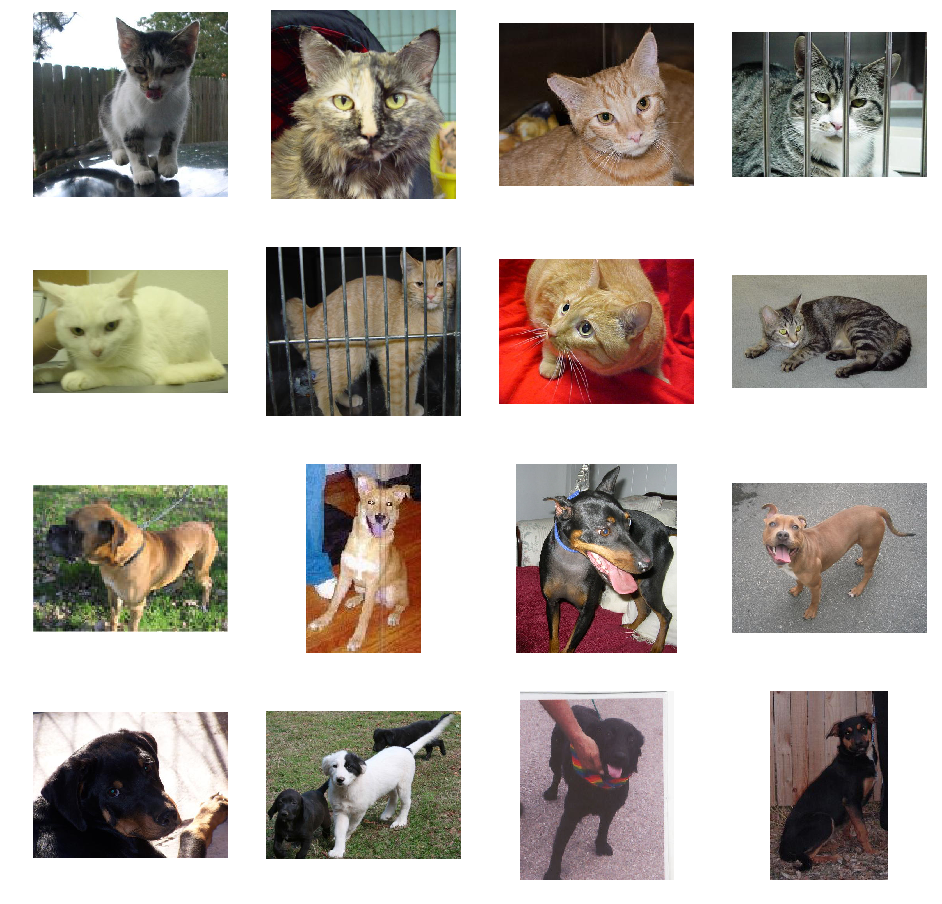

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 10
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


Building a Small Convnet from Scratch to Get to 72% Accuracy
The images that will go into our convnet are 150x150 color images (in the next section on Data Preprocessing, we'll add handling to resize all the images to 150x150 before feeding them into the neural network).

Let's code up the architecture. We will stack 3 {convolution + relu + maxpooling} modules. Our convolutions operate on 3x3 windows and our maxpooling layers operate on 2x2 windows. Our first convolution extracts 16 filters, the following one extracts 32 filters, and the last one extracts 64 filters.

The CNN model (cnn_model_fn) should have the following layers: ● Input layer ● Convolutional layer 1 with 32 filters of kernel size[5,5] ● Pooling layer 1 with pool size**[2,2] **and stride 2 ● Convolutional layer 2 with 64 filters of kernel size[5,5] ● Pooling layer 2 with pool size[2,2] and stride 2 ● Dense layer whose output size is fixed in the hyper parameter: fc_size=32 ● Dropout layer with dropout probability 0.4 Predict the class by doing a softmax on the output of the dropout lay bold text

# Data Preprocessing

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


# Training

The CNN model (cnn_model_fn) should have the following layers: ● Input layer ● Convolutional layer 1 with 32 filters of kernel size[5,5] ● Pooling layer 1 with pool size**[2,2] **and stride 2 ● Convolutional layer 2 with 64 filters of kernel size[5,5] ● Pooling layer 2 with pool size[2,2] and stride 2 ● Dense layer whose output size is fixed in the hyper parameter: fc_size=32 ● Dropout layer with dropout probability 0.4 Predict the class by doing a softmax on the output of the dropout lay bold text

# Set hyper parameters
Run the program with three num_steps : 100,200,300

In [0]:
reset_graph()
img_size = 32
num_channels = 3
img_size_flat = img_size * img_size * num_channels
img_shape = (img_size, img_size)
trainpath='./content/drive/My Drive/Deep_Learning_course_Capstone_Project/train'
testpath='./content/drive/My Drive/Deep_Learning_course_Capstone_Project/test'
labels = {'cats': 0, 'dogs': 1}
fc_size=32 #size of the output of final FC layer
num_steps=300 #Try 100, 200, 300. number of steps that training data should be looped. Usually 20K
tf.logging.set_verbosity(tf.logging.INFO)

In [0]:
reset_graph()
img_size = 32
num_channels = 3
img_size_flat = img_size * img_size * num_channels
img_shape = (img_size, img_size)
trainpath='./content/drive/My Drive/Deep_Learning_course_Capstone_Project/train'
testpath='./content/drive/My Drive/Deep_Learning_course_Capstone_Project/test'
labels = {'cats': 0, 'dogs': 1}
fc_size=32 #size of the output of final FC layer
num_steps=200 #Try 100, 200, 300. number of steps that training data should be looped. Usually 20K
tf.logging.set_verbosity(tf.logging.INFO)

In [0]:
reset_graph()
img_size = 32
num_channels = 3
img_size_flat = img_size * img_size * num_channels
img_shape = (img_size, img_size)
trainpath='./content/drive/My Drive/Deep_Learning_course_Capstone_Project/train'
testpath='./content/drive/My Drive/Deep_Learning_course_Capstone_Project/test'
labels = {'cats': 0, 'dogs': 1}
fc_size=32 #size of the output of final FC layer
num_steps=100 #Try 100, 200, 300. number of steps that training data should be looped. Usually 20K
tf.logging.set_verbosity(tf.logging.INFO)

In [0]:
path = ""
path = "/content/drive/My Drive/Deep_Learning_course_Capstone_Project"
training_data_dir = path + "/train" 
validation_data_dir = path + "/test" 
test_data_dir = path + "data/test"


# Data Augmentation

# Read the image dataset

# Assignment: Define the tensorflow model
The model should have the following layers

input later
conv layer 1 with 32 filters of kernel size[5,5],
pooling layer 1 with pool size[2,2] and stride 2
conv layer 2 with 64 filters of kernel size[5,5],
pooling layer 2 with pool size[2,2] and stride 2
dense layer whose output size is fixed in the hyper parameter: fc_size=32
drop out layer with droput probability 0.4
predict the class by doing a softmax on the output of the dropout layers
Training

For training fefine the loss function and minimize it
For evaluation calculate the accuracy
Reading Material

For ideas look at tensorflow layers tutorial

# The cnn_model_fn has to be defined here by the student

In [0]:
def cnn_model_fn(features, labels, mode):

    ...
    ...

In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import numpy as np

tf.logging.set_verbosity(tf.logging.INFO)

In [0]:
def cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2 and Pooling Layer #2
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Dense Layer
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits Layer
  logits = tf.layers.dense(inputs=dropout, units=10)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }

  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])
  }
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Load training and eval data
train_data = train_generator
eval_data = validation_generator
 

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [0]:
# Create the Estimator
Catdog_classifier = tf.estimator.Estimator(
    model_fn=cnn_model_fn, model_dir="/tmp/catdog_convnet_model")

I0623 14:54:35.865427 140336633853824 estimator.py:1790] Using default config.
I0623 14:54:35.869395 140336633853824 estimator.py:209] Using config: {'_model_dir': '/tmp/catdog_convnet_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa254bf13c8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
# Set up logging for predictions
tensors_to_log = {"probabilities": "softmax_tensor"}

logging_hook = tf.train.LoggingTensorHook(
    tensors=tensors_to_log, every_n_iter=50)

In [0]:
# Train the model
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": train_data},
    y=train_labels,
    batch_size=20,
    num_epochs=None,
    shuffle=True)

In [0]:
# train one step and display the probabilties
Catdog_classifier.train(
    input_fn=train_input_fn,
    steps=1,
  hooks=[logging_hook])

AttributeError: ignored

In [0]:
Catdog_classifier.train(input_fn=train_input_fn, steps=1000)

AttributeError: ignored

# Run the tensorflow model
This section will use the model defined by the student and run the training and evaluation step

In [0]:
#X_train = np.array((X_train/255.0),dtype=np.float16)
#X_test = np.array((X_test/255.0), dtype=np.float16)
X_train = np.array((X_train/255.0),dtype=np.float32)
X_test = np.array((X_test/255.0), dtype=np.float32)

pets_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn, model_dir="/tmp/pets_convnet_model")
#pets_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn)
tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=50)
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": X_train}, y=y_train, batch_size=10,
                                                      num_epochs=None, shuffle=True)
pets_classifier.train(input_fn=train_input_fn, steps=num_steps, hooks=[logging_hook])
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": X_test}, y=y_test, num_epochs=1,shuffle=False)
eval_results = pets_classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)